# Lab 7
## Isaac Updike
### 10/26/20


In [81]:
#import packages

#install.packages('caret')
#install.packages('leaps')

library(tidyverse)
library(caret)
library(leaps)
library(knitr)
library(magrittr)
library(MASS)

In [82]:
#load in data from github, use first row as header, commma seperated
Ames <- read.table("https://msudataanalytics.github.io/SSC442/Labs/data/ames.csv",
                 header = TRUE,
                 sep = ",")



# taken from example, slightly different from starter code 
get_rmse = function(model, data, response) {
  rmse(actual = subset(data, select = response, drop = TRUE),
       predicted = predict(model, data))
}


# get rid of the two collumns
df = Ames[,!(names(Ames) %in% c("OverallCond","OverallQual"))]

#funciton to extract the 
get_complexity = function(model) {
  length(coef(model)) - 1
}

lm.fit = lm(SalePrice ~ GrLivArea * LotArea * YearBuilt * YearRemodAdd, data=df)

mod <- stepAIC(lm.fit, direction = "forward", 
                      trace = FALSE)
get_complexity(step.model)

[1] 15

In [83]:
rmse(actual = df$SalePrice, predicted = predict(lm.fit, df))


[1] 39454.22

In [84]:
lm.fit1 = lm(SalePrice ~ GrLivArea * LotArea * PoolArea * Fireplaces, data=df)

mod1 <- stepAIC(lm.fit1, direction = "forward", 
                      trace = FALSE)

lm.fit2 = lm(SalePrice ~ HalfBath * TotRmsAbvGrd * BsmtFullBath * PoolArea, data=df)

mod2 <- stepAIC(lm.fit2, direction = "forward", 
                      trace = FALSE)
lm.fit3 = lm(SalePrice ~ BsmtFullBath * X2ndFlrSF, data=df)

mod3 <- stepAIC(lm.fit3, direction = "forward", 
                      trace = FALSE)
lm.fit4 = lm(SalePrice ~ ScreenPorch * LotArea * YrSold, data=df)

mod4 <- stepAIC(lm.fit4, direction = "forward", 
                      trace = FALSE)
lm.fit5 = lm(SalePrice ~  MoSold, data=df)

mod5 <- stepAIC(lm.fit5, direction = "forward", 
                      trace = FALSE)


 Letes get the models together in a neat list, use Sapply with get_rmse and get_complexity on each model to gather some info on the models.

In [85]:
model_list <- list(mod,mod1,mod2,mod3,mod4,mod5)
err = sapply(model_list, get_rmse, data = df, response = "SalePrice")
model_complexity = sapply(model_list, get_complexity)

Warning message in predict.lm(model, data):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(model, data):
"prediction from a rank-deficient fit may be misleading"

lets make a simple plot to compare the error and model complexity

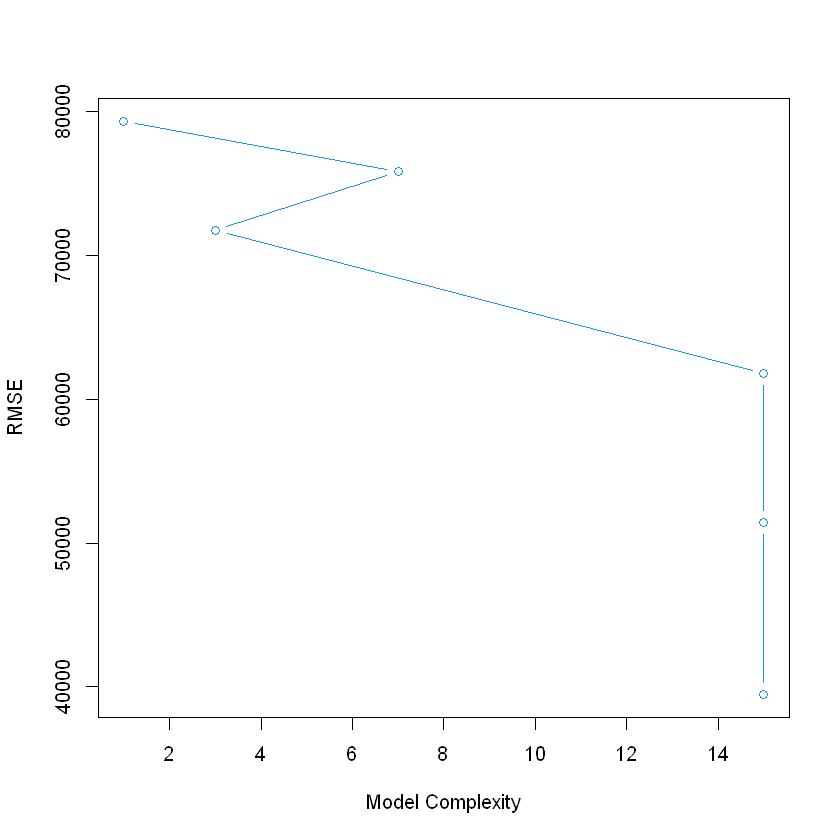

In [86]:
plot(model_complexity, err, type = "b",
     ylim = c(min(train_rmse) - 0.02,
              max(train_rmse) + 0.02),
     col = "dodgerblue",
     xlab = "Model Complexity",
     ylab = "RMSE")
#lines(model_complexity, type = "b", col = "darkorange")
